
---


### **Notebook Information**

---


**Author:** Nitish Gupta  
**Data:** V2X-BSM Network Logs

In [59]:
# Imports and Read files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [60]:
# Setting up plot params and pallete
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [61]:
df_attack = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/q_summer22_intern_data/trace-FakeEEBLJustAttack.csv")
df_post_attack = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/q_summer22_intern_data/trace-FakeEEBLStopPositionUpdateAfterAttack.csv")
df_no_attacks = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/q_summer22_intern_data/trace-NoAttacks.csv")

# extract label and drop categorical data (same as label)
y = df_attack["attack_gt"]
df_attack.drop(["wsm_data", "attack_type"], axis=1, inplace=True)
df_post_attack.drop(["wsm_data", "attack_type"], axis=1, inplace=True)
df_no_attacks.drop(["wsm_data", "attack_type"], axis=1, inplace=True)

In [62]:
df_attack

,rv_id,hv_id,msg_generation_time,msg_rcv_time,msg_count,rv_pos_x,rv_pos_y,rv_pos_z,rv_gps_x,rv_gps_y,...,attack_gt,hv_pos_x,hv_pos_y,hv_pos_z,hv_speed,hv_accel,hv_heading,hv_length,hv_width,hv_height
0,27,45,3.84479,3.844938,17,1750.53,2432.88,0,-71.2463,42.3155,...,0,1725.87,2417.84,0,14.17800,0.000000,-1.437520,2.2,0.90,1.5
1,45,27,3.86746,3.867597,0,1725.87,2417.84,0,-71.2466,42.3156,...,0,1750.53,2432.88,0,4.96539,2.600000,0.060676,5.0,1.80,1.5
2,27,45,3.94479,3.944934,18,1751.05,2432.84,0,-71.2463,42.3155,...,0,1726.06,2419.25,0,14.19400,0.159857,-1.437520,2.2,0.90,1.5
3,45,27,3.96746,3.967593,1,1726.06,2419.25,0,-71.2466,42.3156,...,0,1751.05,2432.84,0,5.22539,2.600000,0.061096,5.0,1.80,1.5
4,27,45,4.04479,4.044943,19,1751.60,2432.81,0,-71.2463,42.3155,...,0,1726.24,2420.56,0,13.19400,-10.000000,-1.437520,2.2,0.90,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16384,93,117,39.99880,39.998988,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,1644.48,1573.72,0,5.55381,0.436747,1.755330,1.6,0.65,1.7
16385,93,75,39.99880,39.998988,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,1646.55,1583.10,0,5.50746,-0.142740,1.811370,2.2,0.90,1.5
16386,1717617586,117,39.99900,39.999183,32,1561.66,1368.33,0,-71.2489,42.3250,...,1,1644.48,1573.72,0,5.55381,0.436747,1.755330,1.6,0.65,1.7
16387,1717617586,93,39.99900,39.999183,32,1561.66,1368.33,0,-71.2489,42.3250,...,1,1561.79,1368.48,0,14.81090,1.970720,2.279540,5.0,1.80,1.5


In [63]:
df_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16389 entries, 0 to 16388
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rv_id                16389 non-null  int64  
 1   hv_id                16389 non-null  int64  
 2   msg_generation_time  16389 non-null  float64
 3   msg_rcv_time         16389 non-null  float64
 4   msg_count            16389 non-null  int64  
 5   rv_pos_x             16389 non-null  float64
 6   rv_pos_y             16389 non-null  float64
 7   rv_pos_z             16389 non-null  int64  
 8   rv_gps_x             16389 non-null  float64
 9   rv_gps_y             16389 non-null  float64
 10  rv_speed             16389 non-null  float64
 11  rv_accel             16389 non-null  float64
 12  rv_heading           16389 non-null  float64
 13  rv_yaw_rate          16389 non-null  float64
 14  rv_length            16389 non-null  float64
 15  rv_width             16389 non-null 

In [64]:
df_post_attack[(df_post_attack["attack_gt"] == 1) & (df_post_attack["rv_id"] == 225223927) & (df_post_attack["hv_id"] == 393)]

,rv_id,hv_id,msg_generation_time,msg_rcv_time,msg_count,rv_pos_x,rv_pos_y,rv_pos_z,rv_gps_x,rv_gps_y,...,attack_gt,hv_pos_x,hv_pos_y,hv_pos_z,hv_speed,hv_accel,hv_heading,hv_length,hv_width,hv_height
9696,225223927,393,33.9822,33.982407,0,1837.71,1737.64,0,-71.2455,42.3217,...,1,1485.31,1381.14,0,1.10670,0.000000,-1.36986,16.5,2.55,4.0
9787,225223927,393,34.0822,34.082406,1,1837.71,1737.64,0,-71.2455,42.3217,...,1,1485.33,1381.25,0,1.18148,0.747851,-1.36986,16.5,2.55,4.0
9878,225223927,393,34.1822,34.182406,2,1837.71,1737.64,0,-71.2455,42.3217,...,1,1485.36,1381.38,0,1.28569,1.042090,-1.36986,16.5,2.55,4.0
9963,225223927,393,34.2822,34.282406,3,1837.71,1737.64,0,-71.2455,42.3217,...,1,1485.39,1381.51,0,1.37342,0.877309,-1.36986,16.5,2.55,4.0
10047,225223927,393,34.3822,34.382405,4,1837.71,1737.64,0,-71.2455,42.3217,...,1,1485.42,1381.66,0,1.47396,1.005350,-1.36986,16.5,2.55,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15833,225223927,393,39.5822,39.582398,56,1837.71,1737.64,0,-71.2455,42.3217,...,1,1486.10,1401.02,0,5.73812,0.769249,-1.36986,16.5,2.55,4.0
15961,225223927,393,39.6822,39.682398,57,1837.71,1737.64,0,-71.2455,42.3217,...,1,1486.21,1401.59,0,5.81588,0.777611,-1.36986,16.5,2.55,4.0
16092,225223927,393,39.7822,39.782398,58,1837.71,1737.64,0,-71.2455,42.3217,...,1,1486.33,1402.16,0,5.90473,0.888494,-1.36986,16.5,2.55,4.0
16226,225223927,393,39.8822,39.882398,59,1837.71,1737.64,0,-71.2455,42.3217,...,1,1486.45,1402.75,0,5.98672,0.819929,-1.36986,16.5,2.55,4.0


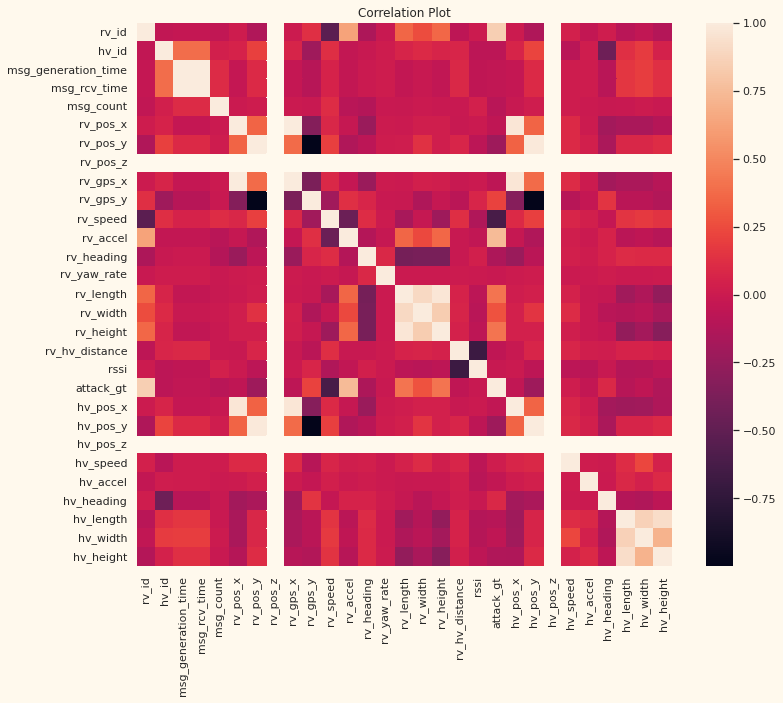

In [65]:
# Plot correlation between relevant features
plt.figure(figsize=(12,10))
plt.title("Correlation Plot")
sns.heatmap(df_attack.corr())

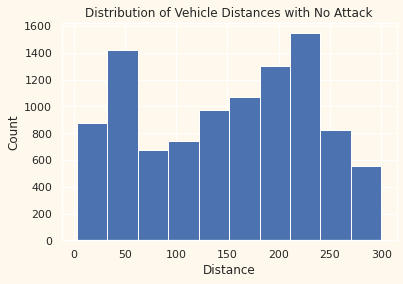

In [66]:
plt.hist(df_no_attacks["rv_hv_distance"])
plt.title("Distribution of Vehicle Distances with No Attack")
plt.xlabel("Distance")
plt.ylabel("Count")

plt.show()

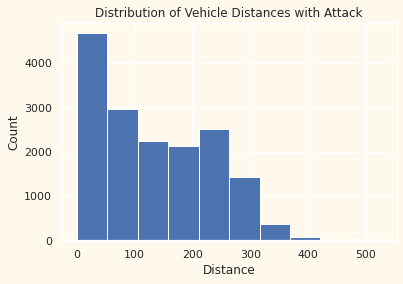

In [67]:
plt.hist(df_attack["rv_hv_distance"])
plt.title("Distribution of Vehicle Distances with Attack")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show()


---


### **Distance based initial filtering (filter 0)**  

---


1. As seen from the no-attack data, the `rv_hv_distance` is generally below 300m. Assuming this as the range of communication, we will filter both attack files to check if the entries beyond this distance are attacks.
2. As can be seen from the output below, for both attack files, all entries beyond `rv_hv_distance > 300` belong to attack category
3. In next cell, we will filter out this data

In [68]:
print("\nFor pre attack file-")
print("Total Attacks:\t\t\t\t\t", df_attack["attack_gt"].sum())
print("Total Entries [d > 300m]:\t\t\t", df_attack[df_attack["rv_hv_distance"] > 300].shape[0])
print("Attack Entries [d > 300m]:\t\t\t", (df_attack["attack_gt"][df_attack["rv_hv_distance"] > 300]).sum())

print("\nFor post attack file-")
print("Total Attacks:\t\t\t\t\t", df_post_attack["attack_gt"].sum())
print("Total Entries [d > 300m]:\t\t\t", df_post_attack[df_post_attack["rv_hv_distance"] > 300].shape[0])
print("Attack Entries [d > 300m]:\t\t\t", (df_post_attack["attack_gt"][df_post_attack["rv_hv_distance"] > 300]).sum())


For pre attack file-
Total Attacks:					 3721
Total Entries [d > 300m]:			 561
Attack Entries [d > 300m]:			 561

For post attack file-
Total Attacks:					 3721
Total Entries [d > 300m]:			 1278
Attack Entries [d > 300m]:			 1278


In [69]:
print("\n[info] Removing entries with rv_hv_distance beyond 300")
df_attack = df_attack[df_attack["rv_hv_distance"] < 300]
print("Remaining Attackers [pre-attack]:\t\t\t", df_attack["attack_gt"].sum())

df_post_attack = df_post_attack[df_post_attack["rv_hv_distance"] < 300]
print("Remaining Attackers [post-attack]:\t\t\t", df_post_attack["attack_gt"].sum())


[info] Removing entries with rv_hv_distance beyond 300
Remaining Attackers [pre-attack]:			 3160
Remaining Attackers [post-attack]:			 2443




---


## **Attack Filtering and Data Engineering**


---


1. Filtering based on `rv_speed` and `rv_accel`
2. Adding three new features for each group of rv_id and hv_id --
  * `d_change`: RV distance change between consecutive message received (independent of HV loc)
  * `gen_time_gap`: Time gap between message generation by RV 
  * `rec_time_gap`: Time gap between message reception by HV

**Remarks: Filtering based on `rv_speed` and `rv_accel` detects all attacks, since `rv_speed` can't be zero when `rv_accel` is non-zero**
Therefore, the analysis after this will not consider these two features together as they will easily solve the attack classification 

In [70]:
# For pre-attack df
# Get all the `rv_id` and `hv_id` groups 
rv_hv_ids = df_attack[["rv_id", "hv_id"]].drop_duplicates().values

# Add new feature columns
df_attack["d_change"]     = 0
df_attack["gen_time_gap"] = 0
df_attack["rec_time_gap"] = 0

attacker_logs16 = []  # For attacker motion viz w.r.t. host
attacker_rv_id = 1814049372
d_change = []
attacker_ids = []
filter1_sum = 0       # Total attackers found with filter 1

# Iterate over all groups
for rv_id, hv_id in rv_hv_ids:
  sub_df_attack = df_attack.loc[(df_attack["rv_id"] == rv_id) & (df_attack["hv_id"] == hv_id)]

  # filter 1: rv_acceleration w/o rv_speed
  if (sub_df_attack.rv_speed.sum() == 0) and (sub_df_attack.rv_accel.sum() > 0):
    attacker_ids.append(rv_id)
    filter1_sum += sub_df_attack.shape[0]
    # print("Possible Attacker: ", rv_id)

  # Get distance between consecutive RV (pos_x, pos_y) 
  start = sub_df_attack[["rv_pos_x", "rv_pos_y"]].values
  end = sub_df_attack[["rv_pos_x", "rv_pos_y"]][1:].values
  d = np.sqrt((start[:-1, 0] - end[:, 0])**2 + (start[:-1, 1] - end[:, 1])**2)
  d = np.concatenate(([0], d)) # append first d_change as zero

  # Time lapse between previous and current RV msg generate time
  start = sub_df_attack[["msg_generation_time"]].values
  end = sub_df_attack[["msg_generation_time"]][1:].values
  gen_time_gap = end[:, 0] - start[:-1, 0]
  gen_time_gap = np.concatenate(([0], gen_time_gap))

  # Time lapse between previous and current HV msg receive time
  start = sub_df_attack[["msg_rcv_time"]].values
  end = sub_df_attack[["msg_rcv_time"]][1:].values
  rec_time_gap = end[:, 0] - start[:-1, 0]
  rec_time_gap = np.concatenate(([0], rec_time_gap))

  # Log for attacker visualization
  # if sub_df_attack['attack_gt'].values[0] == 1 and sub_df_attack.shape[0] > 80:
  #   attacker_logs16.append(sub_df_attack)

  if sub_df_attack['rv_id'].values[0] == attacker_rv_id:
    attacker_logs16.append(sub_df_attack)

  # Add calculated new feature values
  df_attack.loc[(df_attack["rv_id"] == rv_id) & (df_attack["hv_id"] == hv_id), "d_change"] = d
  df_attack.loc[(df_attack["rv_id"] == rv_id) & (df_attack["hv_id"] == hv_id), "gen_time_gap"] = gen_time_gap
  df_attack.loc[(df_attack["rv_id"] == rv_id) & (df_attack["hv_id"] == hv_id), "rec_time_gap"] = rec_time_gap

print("Total attackers found with filter 1:", filter1_sum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Total attackers found with filter 1: 3160


In [55]:
# For post-attack df
# Get all the `rv_id` and `hv_id` groups 
rv_hv_ids = df_post_attack[["rv_id", "hv_id"]].drop_duplicates().values

# Add new feature columns
df_post_attack["d_change"]     = 0
df_post_attack["gen_time_gap"] = 0
df_post_attack["rec_time_gap"] = 0

attacker_logs16 = []  # For attacker motion viz w.r.t. host

d_change = []
attacker_ids = []
filter1_sum = 0       # Total attackers found with filter 1

# Iterate over all groups
for rv_id, hv_id in rv_hv_ids:
  sub_df_attack = df_post_attack.loc[(df_post_attack["rv_id"] == rv_id) & (df_post_attack["hv_id"] == hv_id)]

  # filter 1: rv_acceleration w/o rv_speed
  if (sub_df_attack.rv_speed.sum() == 0) and (sub_df_attack.rv_accel.sum() > 0):
    attacker_ids.append(rv_id)
    filter1_sum += sub_df_attack.shape[0]
    # print("Possible Attacker: ", rv_id)

  # Get distance between consecutive RV (pos_x, pos_y) 
  start = sub_df_attack[["rv_pos_x", "rv_pos_y"]].values
  end = sub_df_attack[["rv_pos_x", "rv_pos_y"]][1:].values
  d = np.sqrt((start[:-1, 0] - end[:, 0])**2 + (start[:-1, 1] - end[:, 1])**2)
  d = np.concatenate(([0], d)) # append first d_change as zero

  # Time lapse between previous and current RV msg generate time
  start = sub_df_attack[["msg_generation_time"]].values
  end = sub_df_attack[["msg_generation_time"]][1:].values
  gen_time_gap = end[:, 0] - start[:-1, 0]
  gen_time_gap = np.concatenate(([0], gen_time_gap))

  # Time lapse between previous and current HV msg receive time
  start = sub_df_attack[["msg_rcv_time"]].values
  end = sub_df_attack[["msg_rcv_time"]][1:].values
  rec_time_gap = end[:, 0] - start[:-1, 0]
  rec_time_gap = np.concatenate(([0], rec_time_gap))

  # Log for attacker visualization
  if sub_df_attack['attack_gt'].values[0] == 1 and sub_df_attack.shape[0] > 80:
    attacker_logs16.append(sub_df_attack)

  # Add calculated new feature values
  df_post_attack.loc[(df_post_attack["rv_id"] == rv_id) & (df_post_attack["hv_id"] == hv_id), "d_change"] = d
  df_post_attack.loc[(df_post_attack["rv_id"] == rv_id) & (df_post_attack["hv_id"] == hv_id), "gen_time_gap"] = gen_time_gap
  df_post_attack.loc[(df_post_attack["rv_id"] == rv_id) & (df_post_attack["hv_id"] == hv_id), "rec_time_gap"] = rec_time_gap

print("Total attackers found with filter 1:", filter1_sum)

Total attackers found with filter 1: 2443


In [18]:
df_post_attack

,rv_id,hv_id,msg_generation_time,msg_rcv_time,msg_count,rv_pos_x,rv_pos_y,rv_pos_z,rv_gps_x,rv_gps_y,...,hv_pos_z,hv_speed,hv_accel,hv_heading,hv_length,hv_width,hv_height,d_change,gen_time_gap,rec_time_gap
0,27,45,3.84479,3.844938,17,1750.53,2432.88,0,-71.2463,42.3155,...,0,14.17800,0.000000,-1.437520,2.2,0.90,1.5,0.000000,0.0,0.000000
1,45,27,3.86746,3.867597,0,1725.87,2417.84,0,-71.2466,42.3156,...,0,4.96539,2.600000,0.060676,5.0,1.80,1.5,0.000000,0.0,0.000000
2,27,45,3.94479,3.944934,18,1751.05,2432.84,0,-71.2463,42.3155,...,0,14.19400,0.159857,-1.437520,2.2,0.90,1.5,0.521536,0.1,0.099996
3,45,27,3.96746,3.967593,1,1726.06,2419.25,0,-71.2466,42.3156,...,0,5.22539,2.600000,0.061096,5.0,1.80,1.5,1.422744,0.1,0.099996
4,27,45,4.04479,4.044943,19,1751.60,2432.81,0,-71.2463,42.3155,...,0,13.19400,-10.000000,-1.437520,2.2,0.90,1.5,0.550818,0.1,0.100009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16382,93,393,39.99880,39.998987,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,6.04568,0.589610,-1.369860,16.5,2.55,4.0,1.489228,0.1,0.100000
16383,93,105,39.99880,39.998987,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,13.11700,-0.131987,-1.302510,16.5,2.55,4.0,1.489228,0.1,0.100000
16384,93,117,39.99880,39.998988,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,5.55381,0.436747,1.755330,1.6,0.65,1.7,1.489228,0.1,0.100000
16385,93,75,39.99880,39.998988,58,1561.79,1368.48,0,-71.2489,42.3250,...,0,5.50746,-0.142740,1.811370,2.2,0.90,1.5,1.489228,0.1,0.100000


### **Analysis on Newly added features**
The following chart shows pairwise distribution of data features along with self distribution (diagonal)
1. The plot reveals that their is no descrepancy between generation and receive time. Thus time fields are handled well by the attackers
2. The variation of `d_change` w.r.t. other features might be interesting to analyze to find patterns
3. Most of the attackers position remains constant w.r.t. host (`rv_hv_distance`)

Text(0.5, 1.08, 'Pairplot of 5 features (includes engineered features)')

<Figure size 432x288 with 0 Axes>

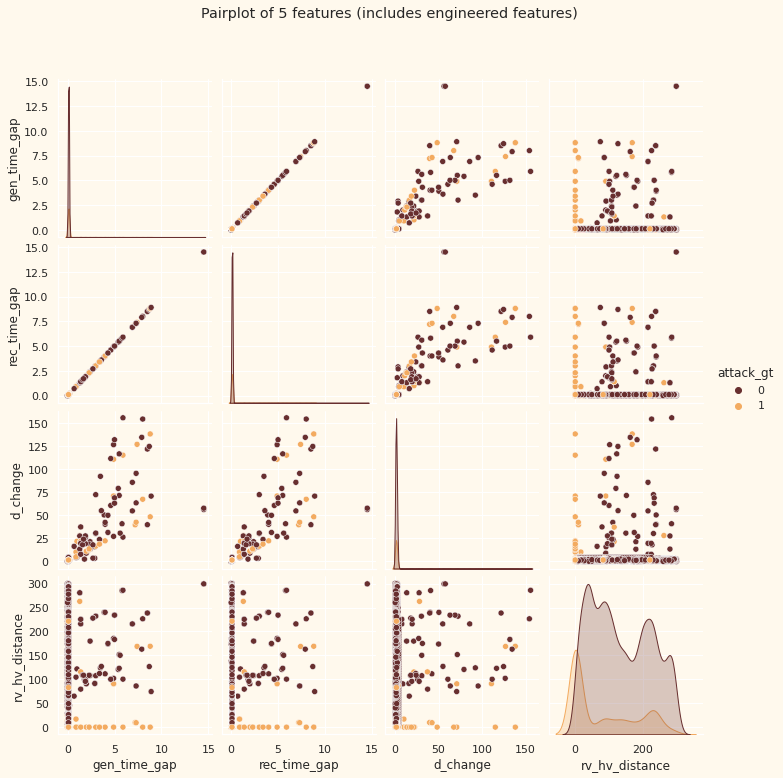

In [31]:
features = ["gen_time_gap", "rec_time_gap", "d_change", "rv_hv_distance", "attack_gt"]
plt.figure()
title = "Pairplot of 5 features (includes engineered features)"
f = sns.pairplot(df_attack[features], hue= "attack_gt", palette= (["#682F2F","#F3AB60"]))
f.fig.suptitle(title, y=1.08)

<Figure size 432x288 with 0 Axes>

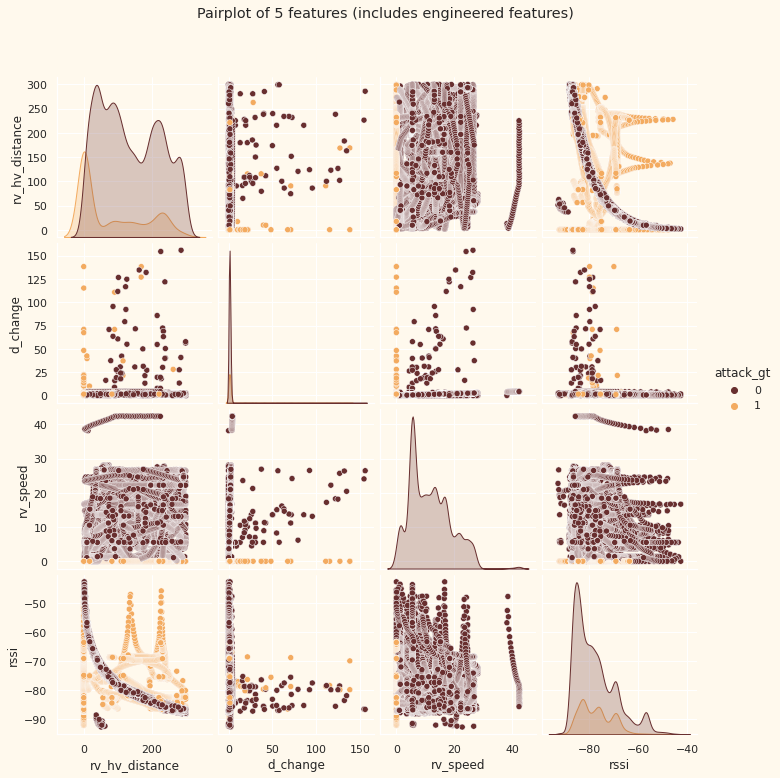

In [32]:
# Let's try another important feature - RSSI
features = ["rv_hv_distance", "d_change", "rv_speed", "rssi", "attack_gt"]
plt.figure()

f = sns.pairplot(df_attack[features], hue= "attack_gt", palette= (["#682F2F","#F3AB60"]))
f.fig.suptitle(title, y=1.08)

plt.show()

<Figure size 432x288 with 0 Axes>

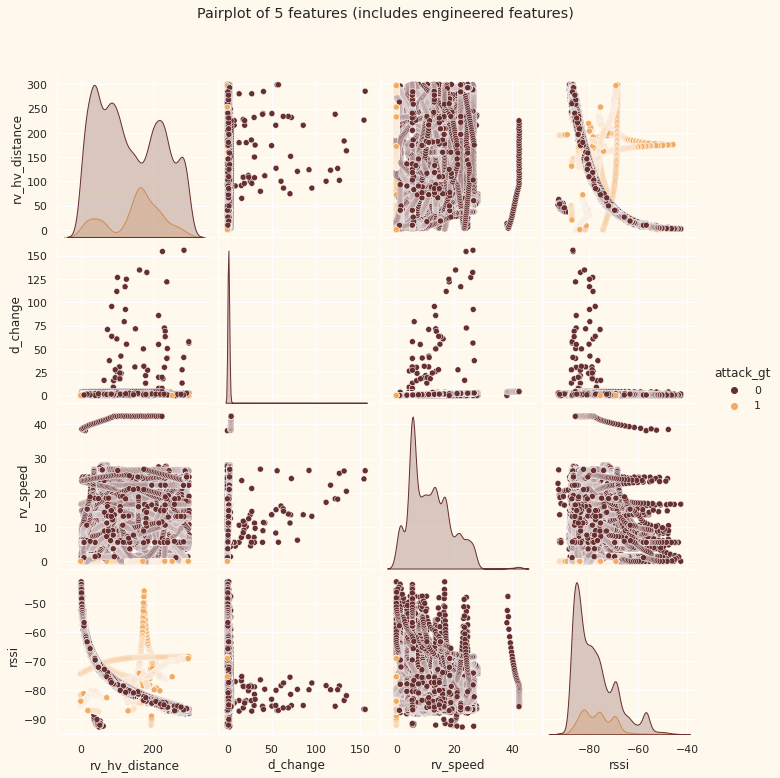

In [33]:
# For post-attack df
features = ["rv_hv_distance", "d_change", "rv_speed", "rssi", "attack_gt"]
plt.figure()
f = sns.pairplot(df_post_attack[features], hue= "attack_gt", palette= (["#682F2F","#F3AB60"]))
f.fig.suptitle(title, y=1.08)
plt.show()

### **Important Analysis and Takeaway**
* Note the variation of RSSI value w.r.t. rv_hv_distance. 
* This is important because the attacker has no control over the RSSI value which is calculated on the HV
* As RSSI is a direct function of the distance between RV and HV and is dependent on the physical medium, it shows high descrepancy between attack and no-attack

<Figure size 432x288 with 0 Axes>

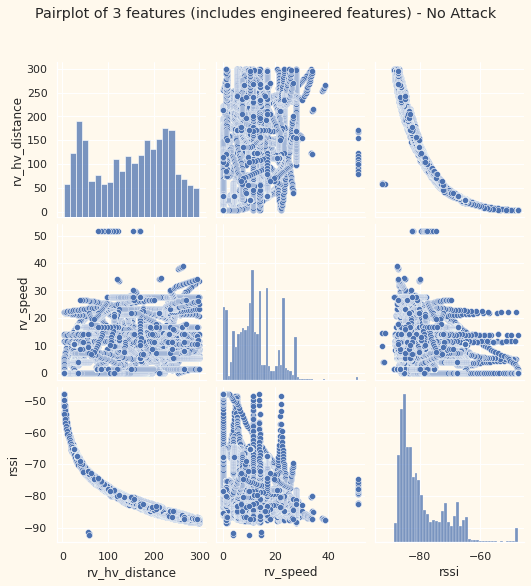

In [34]:
# Confirming the above descrepancy with no-attack df
features = ["rv_hv_distance", "rv_speed", "rssi"]
plt.figure()
f = sns.pairplot(df_no_attacks[features], palette= (["#682F2F","#F3AB60"]))
title = "Pairplot of 3 features (includes engineered features) - No Attack"
f.fig.suptitle(title, y=1.08)
plt.show()

## **DNN classifier with Pytorch**


In [35]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Classifier DNN model
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()   
        self.layer_1 = nn.Linear(input_dim, 10) 
        self.layer_2 = nn.Linear(10, 32)
        self.layer_3 = nn.Linear(32, 10)
        self.layer_out = nn.Linear(10, 2) 
        
        self.relu = nn.ReLU()
        self.sig = nn.Softmax()
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.sig(self.layer_out(x))
        
        return x

In [37]:
def train_network(train_loader, network, epochs):
  # Begin Training
  loss_log = []

  for epoch in tqdm(range(epochs)): 
    # print("Epoch:", epoch)
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
      inputs, labels = data

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 1000 == 0:
        # print("Loss = %f" % (loss.item()))
        loss_log.append(loss.item())
      
  print('Finished Training')
  return loss_log

### **Feature Set 1**

#### Data preparation steps
* Append both attack dataframes
* Consider three features: `rv_hv_distance`, `rssi`, `rv_accel`
* OneHotEncode labels
* Apply normalize transform
* Convert to tensors
* Prepare Dataloader with Batch-size = 32

In [38]:
features = ["rv_hv_distance", "rssi", "rv_accel"]
dataX = df_attack[features].values
datay = df_attack[["attack_gt"]].values
dataX = np.vstack((dataX, df_post_attack[["rv_hv_distance", "rssi", "rv_accel"]].values))
datay = np.vstack((datay, df_post_attack[["attack_gt"]].values))

enc = OneHotEncoder()
enc.fit(datay)
datay = enc.transform(datay).toarray()

X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train).float() 
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

train_data = []
for i in range(len(X_train)):
   train_data.append([X_train[i], y_train[i]])

test_data = []
for i in range(len(X_test)):
   test_data.append([X_test[i], y_test[i]])

train_loader = DataLoader(dataset=train_data, batch_size=32)
test_loader = DataLoader(dataset=test_data, batch_size=1)

#### **Train step**

In [39]:
net = Net(input_dim=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss_log = train_network(train_loader, net, epochs=100)

100%|██████████| 100/100 [01:47<00:00,  1.08s/it]

Finished Training


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Training Loss')

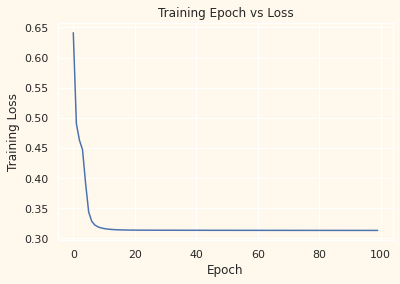

In [40]:
sns.lineplot(np.arange(len(loss_log)), loss_log)
plt.title("Training Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")

#### **Test step**
The high accuracy is understandable as we considered `rv_accel` as featrue in this case. This feature is not well manipulated by the attacker and can be caught. Even `rv_speed` will have the same effect. 

In [41]:
y_pred_list = []
net.eval()
correct = 0
with torch.no_grad():
    for i, X_batch in enumerate(test_loader):
      inputs, labels = X_batch
      y_test_pred = net(inputs)
      y_pred_tag = torch.round(y_test_pred)

      if enc.inverse_transform(y_pred_tag)[0][0] == enc.inverse_transform(y_test[i].numpy().reshape(1, -1))[0][0]:
        correct += 1
      y_pred_list.append(y_pred_tag.numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])
print("Test accuracy", correct/y_test.shape[0])

Test accuracy 0.9911118293471235


### **Feature Set 2**

#### Data preparation steps

In [42]:
features = ["rv_hv_distance", "rssi", "rv_yaw_rate"]
dataX = df_attack[features].values
datay = df_attack[["attack_gt"]].values
dataX = np.vstack((dataX, df_post_attack[["rv_hv_distance", "rssi", "rv_yaw_rate"]].values))
datay = np.vstack((datay, df_post_attack[["attack_gt"]].values))

enc = OneHotEncoder()
enc.fit(datay)
datay = enc.transform(datay).toarray()

X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train).float() 
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

train_data = []
for i in range(len(X_train)):
   train_data.append([X_train[i], y_train[i]])

test_data = []
for i in range(len(X_test)):
   test_data.append([X_test[i], y_test[i]])

train_loader = DataLoader(dataset=train_data, batch_size=32)
test_loader = DataLoader(dataset=test_data, batch_size=1)

#### **Train step**

100%|██████████| 100/100 [01:31<00:00,  1.10it/s]

Finished Training



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Training Loss')

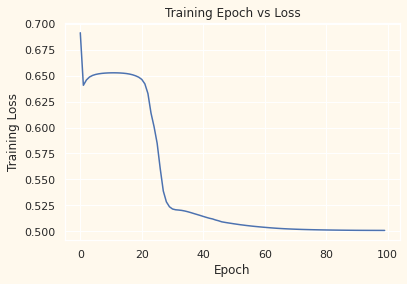

In [43]:
net = Net(input_dim=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

loss_log = train_network(train_loader, net, epochs=100)
sns.lineplot(np.arange(len(loss_log)), loss_log)
plt.title("Training Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")

#### **Test step**

In [ ]:
y_pred_list = []
net.eval()
correct = 0
with torch.no_grad():
    for i, X_batch in enumerate(test_loader):
      inputs, labels = X_batch
      y_test_pred = net(inputs)
      y_pred_tag = torch.round(y_test_pred)

      if enc.inverse_transform(y_pred_tag)[0][0] == enc.inverse_transform(y_test[i].numpy().reshape(1, -1))[0][0]:
        correct += 1
      y_pred_list.append(y_pred_tag.numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])
print("Test accuracy", correct/y_test.shape[0])

Test accuracy 0.8978668390433097


## **GAN Model**


In [ ]:
ON_GPU = True
DEVICE = torch.device(
    "cuda:0" if torch.cuda.is_available() and ON_GPU else "cpu")

FEATURE_SIZE = 9
EPOCH_RATE = 50
NUM_EPOCHS = 50
NOISE_DIMENSION = 50
LEARNING_RATE = 0.0002
OPTIMIZER_PARAMS = (0.5, 0.999)
BATCH_SIZE = 32

class Generator(nn.Module):
    def __init__(self,):
        super().__init__()

        self.l1 = nn.Linear(NOISE_DIMENSION, 32, bias=False)
        self.b1 = nn.BatchNorm1d(32, 0.8)
        self.l2 = nn.Linear(32, 64, bias=False)
        self.b2 = nn.BatchNorm1d(64, 0.8)
        self.l3 = nn.Linear(64, 32, bias=False)
        self.b3 = nn.BatchNorm1d(32, 0.8)
        self.l4 = nn.Linear(32, FEATURE_SIZE, bias=False)
        
        self.relu = nn.LeakyReLU(0.25)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.b1(self.l1(x)))
        x = self.relu(self.b2(self.l2(x)))
        x = self.relu(self.b3(self.l3(x)))
        out = self.tanh(self.l4(x))
        return out


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.l1 = nn.Linear(FEATURE_SIZE, 10)
        self.relu1 = nn.LeakyReLU(0.25)
        self.l2 = nn.Linear(10, 32)
        self.relu2 = nn.LeakyReLU(0.25)
        self.l3 = nn.Linear(32, 16)
        self.relu3 = nn.LeakyReLU(0.25)
        self.l4 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.l1(x))
        x = self.relu2(self.l2(x))
        x = self.relu3(self.l3(x))
        out = self.sigmoid(self.l4(x))
        return out

def generate_noise(batch_size = 1, noise_dimension = NOISE_DIMENSION, device=None):
    return torch.randn(batch_size, noise_dimension, device=device)

# reset gradients
def zero_grad(model):
    for param in model.parameters():
        param.grad = None

# do one step forward and backward pass through specified network
def forward_backward_pass(model, data, loss_function, targets):
    outputs = model(data)
    error = loss_function(outputs, targets)
    error.backward()
    return error.item()

# perform single train step
def train_step(generator, discriminator, real_data, loss_function, generator_optimizer, discriminator_optimizer, device=DEVICE):
    real_label, fake_label = 1.0, 0.0
    real_images = real_data.to(device)
    actual_batch_size = real_images.size(0)
    label = torch.full((actual_batch_size, 1), real_label, device=device)

    zero_grad(discriminator)

    error_real_images = forward_backward_pass(
        discriminator, real_images, loss_function, label)
    # noise = torch.randn(actual_batch_size, NOISE_DIMENSION, DEVICE)
    noise = generate_noise(actual_batch_size, device=device)

    generated_images = generator(noise)

    label.fill_(fake_label)
    error_generated_images = forward_backward_pass(
        discriminator, generated_images.detach(), loss_function, label)
    discriminator_optimizer.step()

    zero_grad(generator)
    label.fill_(real_label)
    error_generator = forward_backward_pass(
        discriminator, generated_images, loss_function, label)
    generator_optimizer.step()

    error_discriminator = error_real_images + error_generated_images
    return error_generator, error_discriminator

# perform single epoch step
def epoch_step(dataloader, generator, discriminator, loss_function, generator_optimizer, discriminator_optimizer, epoch):
    for batch_no, real_data in enumerate(dataloader, 0):
        generator_loss_val, discriminator_loss_val = train_step(
            generator, discriminator, real_data, loss_function, generator_optimizer, discriminator_optimizer)
        if batch_no % EPOCH_RATE == 0:
            print('Mini-batch %d: Gen-loss: %e, Dis-loss: %e' %
                  (batch_no, generator_loss_val, discriminator_loss_val))

    torch.cuda.empty_cache()


def train_dcgan(dataloader):

    generator = Generator()
    discriminator = Discriminator()
    generator.to(DEVICE)
    discriminator.to(DEVICE)

    loss_function = nn.BCELoss()

    generator_optimizer = torch.optim.AdamW(
        generator.parameters(), lr=LEARNING_RATE, betas=OPTIMIZER_PARAMS)
    discriminator_optimizer = torch.optim.AdamW(
        discriminator.parameters(), lr=LEARNING_RATE, betas=OPTIMIZER_PARAMS)

    for epoch in range(NUM_EPOCHS):
        print('Epochs:', epoch)
        epoch_step(dataloader, generator, discriminator, loss_function,
                      generator_optimizer, discriminator_optimizer, epoch)

    print("Training Finished")
    return generator

### **Training GAN**

In [ ]:
gan_data = df_no_attacks[["rv_pos_x", "rv_pos_y", "rv_pos_z",	"rv_speed",	"rv_accel", "rv_heading", "rv_yaw_rate", "rv_hv_distance",	"rssi"]].values

scaler = StandardScaler()
X_train = scaler.fit_transform(gan_data)

X_train = torch.from_numpy(X_train).float()
train_data = DataLoader(dataset=X_train, batch_size=32, shuffle=True)

gen=train_dcgan(train_data)

Epochs: 0
Mini-batch 0: Gen-loss: 8.055940e-01, Dis-loss: 1.398837e+00
Mini-batch 50: Gen-loss: 7.833123e-01, Dis-loss: 1.384380e+00
Mini-batch 100: Gen-loss: 7.613707e-01, Dis-loss: 1.364072e+00
Mini-batch 150: Gen-loss: 7.154907e-01, Dis-loss: 1.380208e+00
Mini-batch 200: Gen-loss: 7.131795e-01, Dis-loss: 1.380174e+00
Mini-batch 250: Gen-loss: 7.416059e-01, Dis-loss: 1.340641e+00
Mini-batch 300: Gen-loss: 7.321754e-01, Dis-loss: 1.313595e+00
Epochs: 1
Mini-batch 0: Gen-loss: 7.217603e-01, Dis-loss: 1.338699e+00
Mini-batch 50: Gen-loss: 7.138410e-01, Dis-loss: 1.295039e+00
Mini-batch 100: Gen-loss: 7.181038e-01, Dis-loss: 1.291883e+00
Mini-batch 150: Gen-loss: 7.123477e-01, Dis-loss: 1.290362e+00
Mini-batch 200: Gen-loss: 6.939102e-01, Dis-loss: 1.310347e+00
Mini-batch 250: Gen-loss: 7.032369e-01, Dis-loss: 1.356215e+00
Mini-batch 300: Gen-loss: 7.319566e-01, Dis-loss: 1.382921e+00
Epochs: 2
Mini-batch 0: Gen-loss: 7.690077e-01, Dis-loss: 1.349809e+00
Mini-batch 50: Gen-loss: 8.046781

### **Testing Generator Performance on Feature Set 2 Classifier**
* For a batch of samples, the generator was able to fool discriminator (misclassification) 33% of the time
* This is in contrast to the original Feature set 2 classifier accuracy, which was 89.78%
* In the current basic implementation of GAN, generator generates a single and independent data sample (which is not useful in practical case)
* For an attack to be believable, the generator is supposed to generate time dependent RV data such that the current sample is dependent on past few samples
* LSTMs can consider a time frame of data in order to generate consecutive sample of generator fake data

In [ ]:
noise = generate_noise(32, device=DEVICE)
generated_images = gen(noise).detach().cpu().numpy()
generated_images = np.array([generated_images[-2], generated_images[-1], generated_images[-3]]).T

datay = np.ones(len(generated_images)).reshape(len(generated_images), -1)
datay = enc.transform(datay).toarray()

test_data = []
for i in range(len(generated_images)):
   test_data.append([generated_images[i], datay])

test_loader = DataLoader(dataset=test_data, batch_size=1)

y_pred_list = []
net.eval()
correct = 0
with torch.no_grad():
    for i, X_batch in enumerate(test_loader):
      inputs, labels = X_batch
      inputs = inputs
      y_test_pred = net(inputs)
      y_pred_tag = torch.round(y_test_pred)

      if enc.inverse_transform(y_pred_tag)[0][0] == enc.inverse_transform(y_test[i].numpy().reshape(1, -1))[0][0]:
        correct += 1

      y_pred_list.append(y_pred_tag.numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])

print("Discriminator accuracy on fake data:", correct/datay.shape[0])

Discriminator accuracy on fake data: 0.7777777777777778


## **Additional Future Analysis**
* Consider a single attacker and find the pattern of it's motion in time w.r.t. the target HV under attack 
* Note that not all HVs that receive msgs from a particular RV are under attack. Most probably the attack target is a single HV
* My assumption is that the motion of attacker RV will be to closely move ahead of HVs pos_x and pos_y
* This will help in analysis because such behavior is suspicious (RSSI will definitely help)  
* In a network of vehicle, all HVs can collaborate to classify a particular the attacker by using multiple features (prominently RSSI)

The following plots show movement of attacker with `rv_id = 1814049372`

Note that only in the last subplot the attacker gets close to HV, and for all other HVs, the attacker's misclassification is tolerable

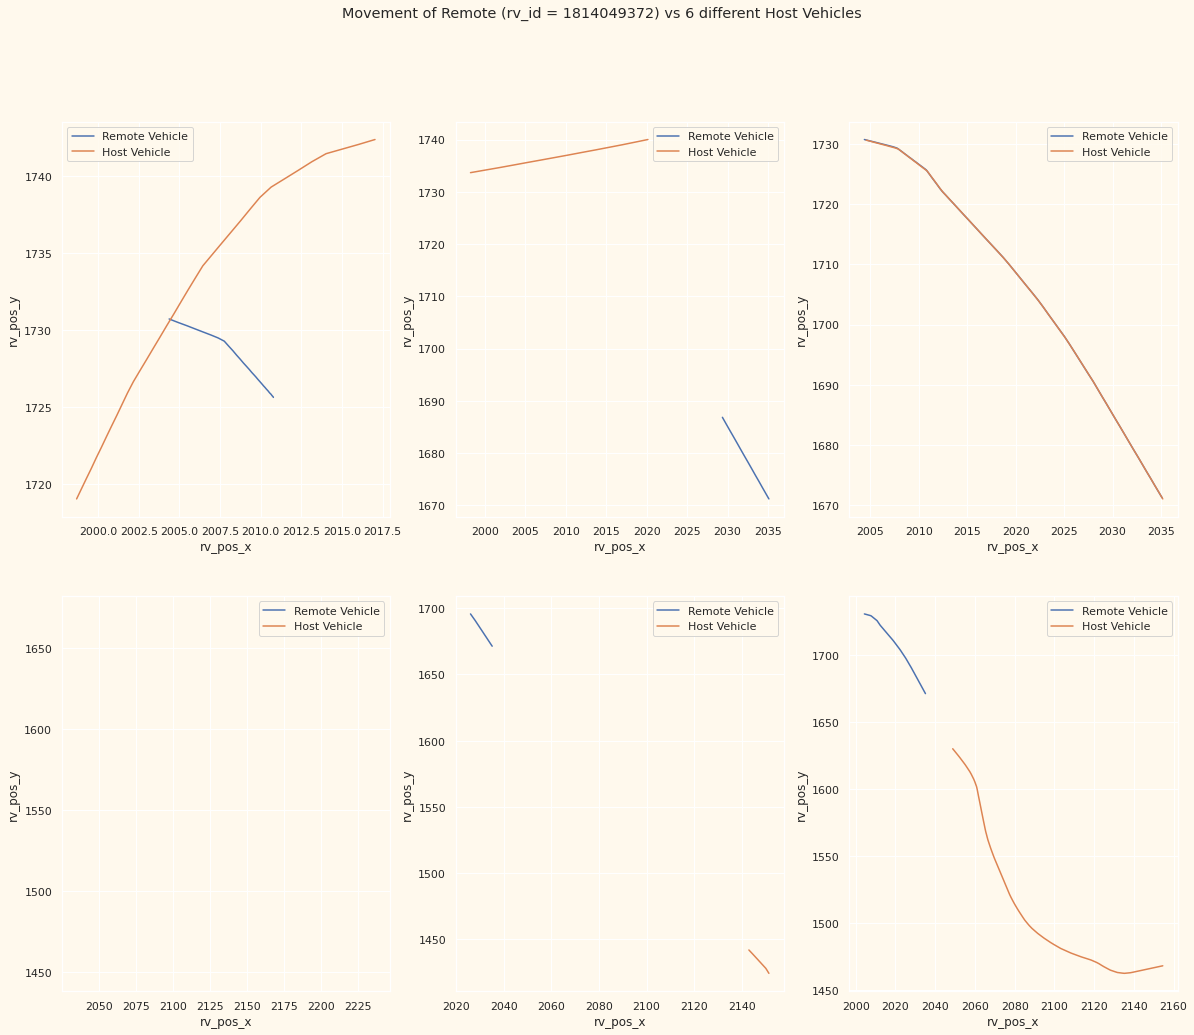

In [71]:
from numpy.lib.function_base import append
attacker_logs16.reverse()
# print(len(attacker_logs16))

# Plotting vehicle positions
f = plt.figure(figsize=(20,16))
plt.suptitle("Movement of Remote (rv_id = 1814049372) vs 6 different Host Vehicles")
for i in range(6):
    f.add_subplot(2, 3, i+1)
    
    sns.lineplot(data=attacker_logs16[i], x=attacker_logs16[i]["rv_pos_x"], y=attacker_logs16[i]["rv_pos_y"])
    sns.lineplot(data=attacker_logs16[i], x=attacker_logs16[i]["hv_pos_x"], y=attacker_logs16[i]["hv_pos_y"])
    plt.legend(labels=["Remote Vehicle","Host Vehicle"])

plt.show()